# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [28]:

# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [30]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [31]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [32]:
# Extract all rows of data
table = soup.find('table', class_='table')
# table



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [33]:
# Create an empty list
mars_facts = []
# Loop through the scraped data to create a list of rows
# Find all table rows (<tr> elements) within the table
for row in soup.find_all('tr'):
    row_data = []
    for cell in row.find_all('td'):
        # Extract the text content of the cell
        text = cell.get_text(strip=True)
        row_data.append(text)

    # Add the row data to the mars_facts list
    mars_facts.append(row_data)

In [34]:
# find column names

col_names = table.find_all('th')

columns=[]
for column in col_names:
    title=column.text
    columns.append(title)
    
columns



['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [35]:
# column names 
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_facts, columns=column_names)


In [36]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [37]:
# Remove the first row from the DataFrame
mars_df = mars_df.iloc[1:]

In [38]:
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [39]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [40]:
# Change data types for data analysis
mars_df['id']=mars_df['id'].astype(int)
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol']=mars_df['sol'].astype(int)
mars_df['ls']=mars_df['ls'].astype(int)
mars_df['month']=mars_df['month'].astype(int)
mars_df['min_temp']=mars_df['min_temp'].astype(float)
mars_df['pressure']=mars_df['pressure'].astype(float)



/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_44699/3367526020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mars_df['id']=mars_df['id'].astype(int)
/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_44699/3367526020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])
/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_44699/3367526020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [41]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [42]:
# 1. How many months are there on Mars?
# Find the column containing the number of months
month_column = 'month'  

# Count the unique values in the month column
num_months = mars_df[month_column].nunique()

print("There are", num_months, "months on Mars.")

There are 12 months on Mars.


In [43]:
# 2. How many Martian days' worth of data are there?
sol_column = 'sol'  
# Calculate the total number of unique Martian days
num_martian_days = mars_df[sol_column].nunique()

print("There are", num_martian_days, "Martian days worth of data in the dataset.")

There are 1867 Martian days worth of data in the dataset.


In [44]:
# 3. What is the average low temperature by month?
temp_column = 'min_temp'
# Group the data by month and calculate the mean of the low temperature
average_low_temp = mars_df.groupby(month_column)[temp_column].mean()
print("Average low temperature by month:\n", average_low_temp)


Average low temperature by month:
 month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


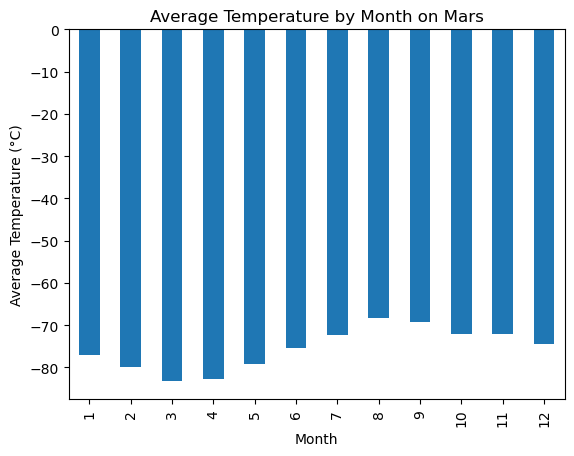

In [45]:
# Plot the average temperature by month
# Create the plot
average_low_temp.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature by Month on Mars")
plt.show()

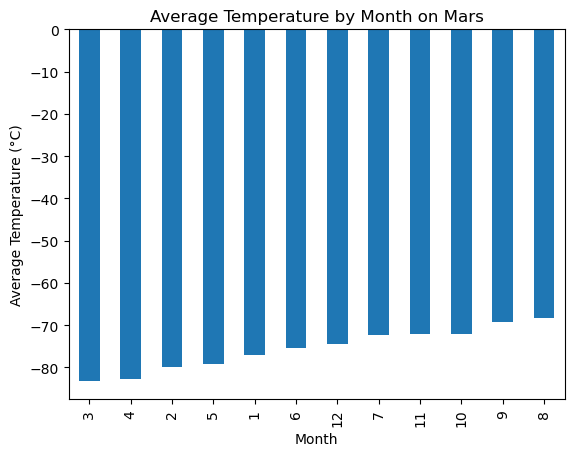

In [47]:
# Identify the coldest and hottest months in Curiosity's location

average_low_temp.sort_values().plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature by Month on Mars")
plt.show()

In [48]:
# print coldest/ hottest months

month_min_temp = average_low_temp.idxmin()
month_max_temp = average_low_temp.idxmax()

print("Coldest month:", month_min_temp)
print("Hottest month:", month_max_temp)

Coldest month: 3
Hottest month: 8


In [49]:
# 4. Average pressure by Martian month

month_column = 'month' 
pressure_column = 'pressure' 

# Group the data by month and calculate the mean pressure
average_pressure_by_month = mars_df.groupby(month_column)[pressure_column].mean()

# Print the results
print("Average pressure by Martian month:")
print(average_pressure_by_month)



Average pressure by Martian month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [50]:
# # find the months with highest and lowest pressure


# Find the month with the highest pressure
highest_pressure_month = mars_df.loc[mars_df[pressure_column].idxmax()][month_column]

# Find the month with the lowest pressure
lowest_pressure_month = mars_df.loc[mars_df[pressure_column].idxmin()][month_column]

# Print the results
print("Month with highest pressure:", highest_pressure_month)
print("Month with lowest pressure:", lowest_pressure_month)

Month with highest pressure: 9
Month with lowest pressure: 5


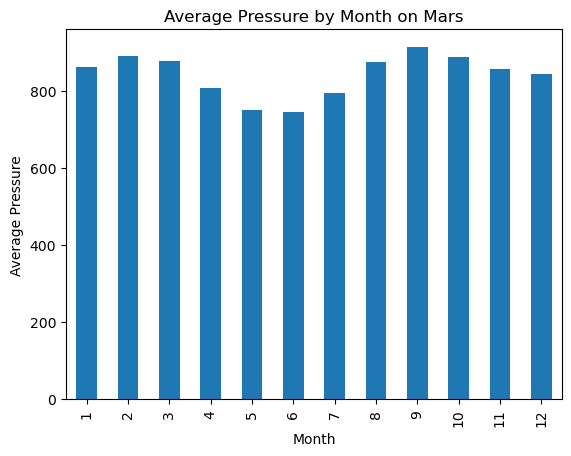

In [51]:
# Plot the average pressure by month
average_pressure_by_month.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.title("Average Pressure by Month on Mars")
plt.show()

In [54]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# find initial solar longitude and determine amount of days until it reaches same longitude
init_long= mars_df['ls'].iloc[0]
init_long

# # same longitude numbers
same_long=mars_df.loc[mars_df['ls']==init_long].reset_index()
same_long

martian_years = same_long['sol'][1]-same_long['sol'][0]
martian_years
# # number of days in between 1346-678 = 668
print(f'In one Martian year, roughly {martian_years} days pass on Earth')


In one Martian year, roughly 668 days pass on Earth


Text(0.5, 1.0, 'Mars Orbit around the Sun')

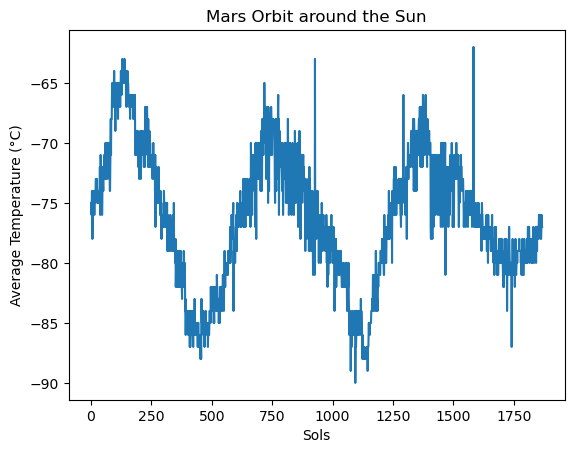

In [55]:
mars_df['min_temp'].plot()
plt.xlabel("Sols")
plt.ylabel("Average Temperature (°C)")
plt.title("Mars Orbit around the Sun")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [56]:
# Write the data to a CSV
mars_df.to_csv('mars_table.csv',index=False)

In [57]:
browser.quit()